# GUC Clustering Project 

### Note: 
##### Outputs are hidden to provide better visibility. Click on each output to display

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from IPython.display import display

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
#display_cluster(Multi_blob_Data)

##### Test arrays and dataframes I will work with 

In [5]:
test = np.array(Multi_blob_Data)
df_s = pd.DataFrame(test)
test

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

###### Using Kmeans with different values of K to cluster the data and diplaying the output

In [12]:
def compare_kmeans(K) :    
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(test)
    
    plt.scatter(test[:,0],test[:,1], c=kmeans.labels_, cmap='rainbow', s=12)
    plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', s=12)
    
    plt.title('Scatter of {} clusters'.format(K))
    #plt.title('Scatter of K clusters')
    plt.show()

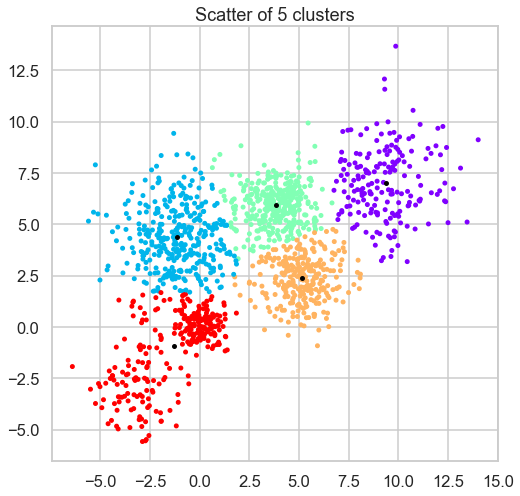

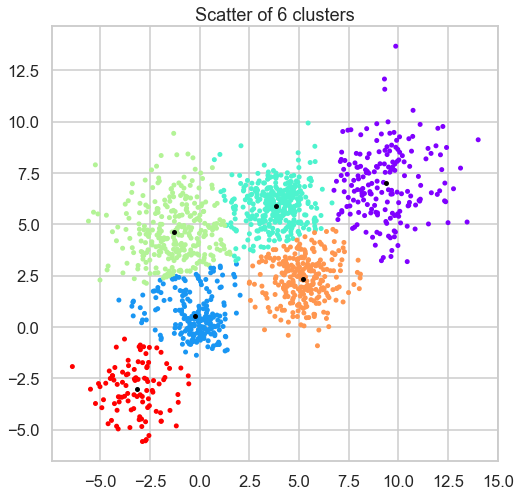

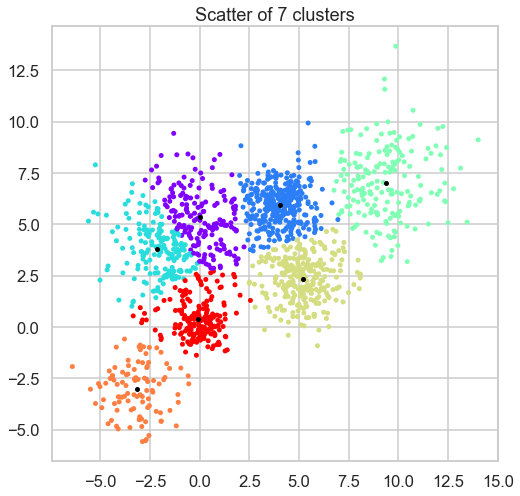

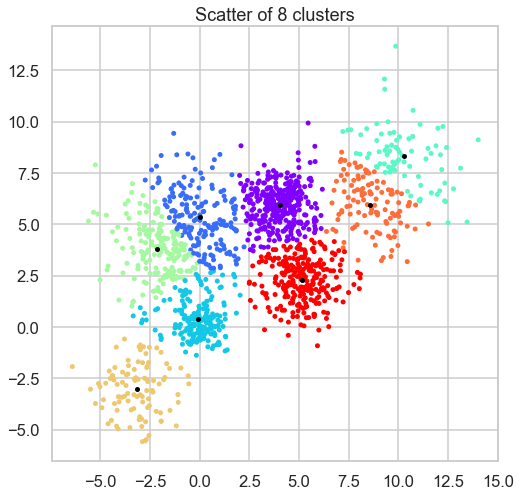

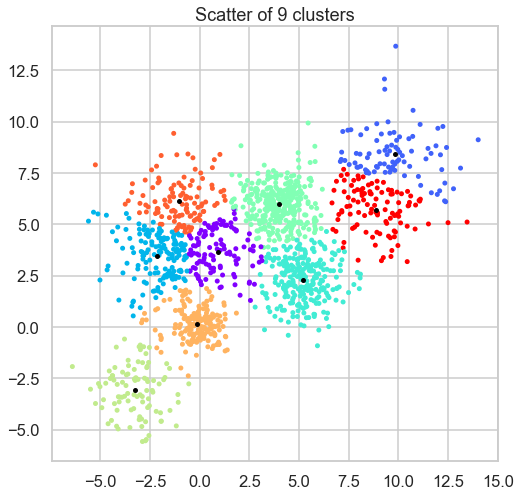

In [13]:
for k_values in range(5,10):
    compare_kmeans(k_values)

### Elbow Method

###### Plotting distortion function versus K and determining the approriate value of k


In [17]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K_rng = range(1,10)

for k in K_rng:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(test)
    kmeanModel.fit(test)
 
    distortions.append(sum(np.min(cdist(test, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / test.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(test, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / test.shape[0]
    mapping2[k] = kmeanModel.inertia_

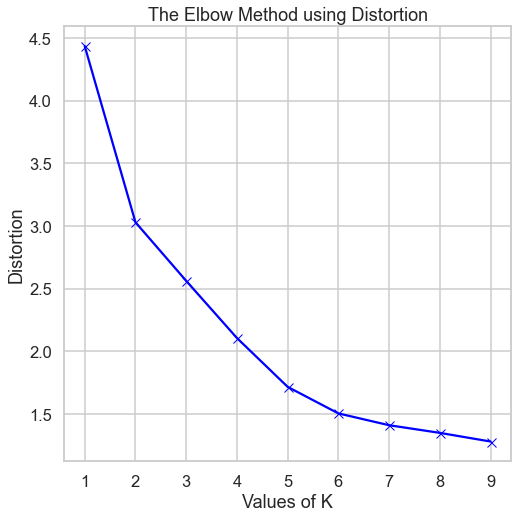

In [20]:
plt.plot(K_rng, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

A good K value here would be 5 as it is starts a constant decreasing trend

#### Silhouette Score 

In [82]:
# Library temporarily not working and requires deprecating scikit learn to work and this will affect other libraries
# Issue raised here: https://github.com/DistrictDataLabs/yellowbrick/issues/1137
from yellowbrick.cluster import SilhouetteVisualizer

ImportError: cannot import name 'safe_indexing' from 'sklearn.utils' (C:\Users\gamze\anaconda3\lib\site-packages\sklearn\utils\__init__.py)

In [67]:
score = silhouette_score(test, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.463


NameError: name 'SilhouetteVisualizer' is not defined

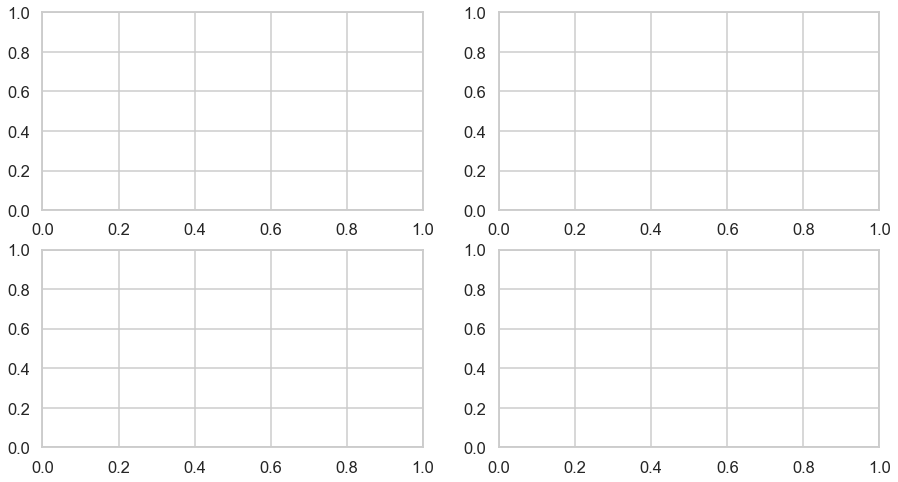

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [21]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster import hierarchy

###### Preparing the data

In [22]:
                                    ####### This wont't be used for now #######

# Scaling the data so that all the features become comparable
scaler = StandardScaler()
df_s_scaled = scaler.fit_transform(df_s)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
df_s_normalized = normalize(df_s_scaled)
  
# Converting the numpy array into a pandas DataFrame
df_s_normalized = pd.DataFrame(df_s_normalized)

# After normalizing the range is now [-1,1]

###### Use AgglomerativeClustering function to to cluster the above data and calculate silhouette_score

In [48]:
N_clusters = []
silhouette_scores= []
def Custom_Aggl_Clust(aff,link,dist):
    
    ac = AgglomerativeClustering(n_clusters = None, affinity = aff, linkage =link,
                                distance_threshold = dist, compute_full_tree =True).fit(df_s)
  
    # Visualizing the clustering    
    plt.scatter(df_s[0], df_s[1], c = ac.fit_predict(df_s), cmap ='rainbow',s =13)
    plt.title("Affinity: {} || Linkage: {} || Number of clusters: {}".format(aff,link,ac.n_clusters_))
    plt.show()
    
    N_clusters.append(ac.n_clusters_)
    # Calculating and storing silhouette scores
    try:
        silhouette_scores.append(silhouette_score(df_s, ac.fit_predict(df_s)))
    except ValueError:
        pass

# Plotting a bar graph to compare the results
def Silhouette_Score_plt():
    N_clusters.sort()
    while (N_clusters.count(1)):
        N_clusters.remove(1)
    print(N_clusters,silhouette_scores)
    plt.bar(N_clusters, silhouette_scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Scores')
    plt.show()

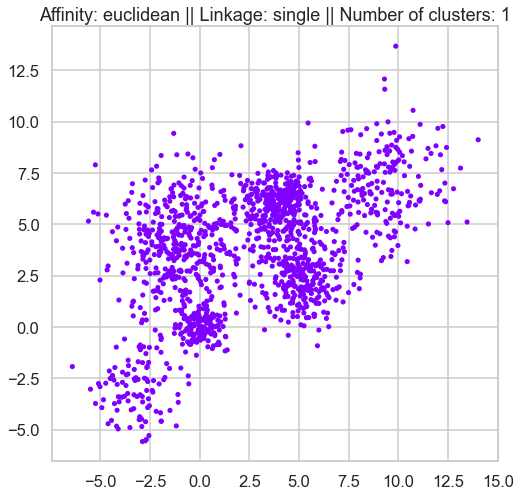

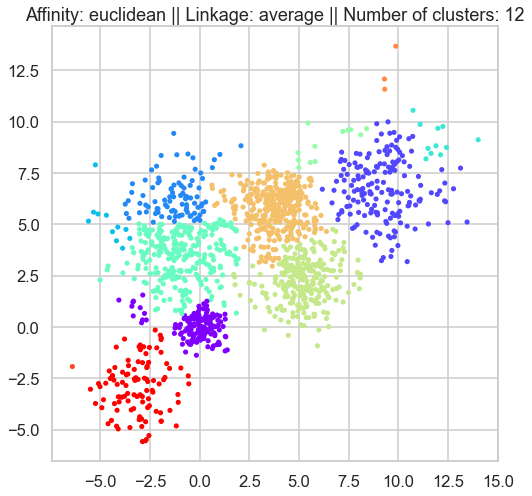

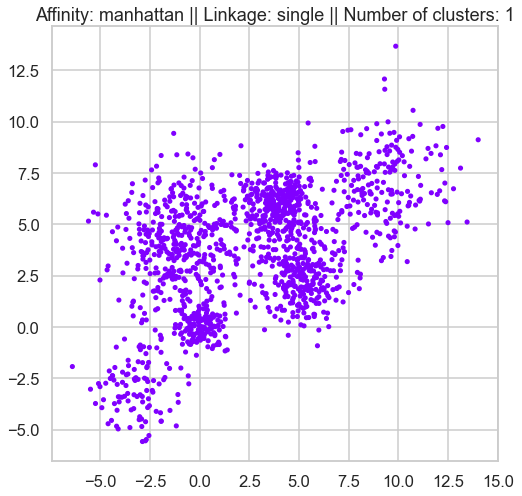

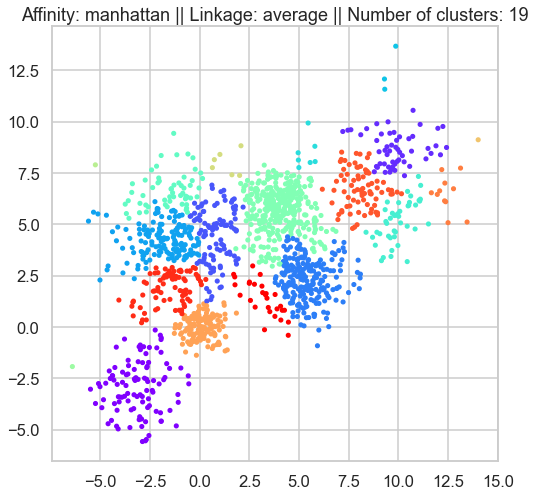

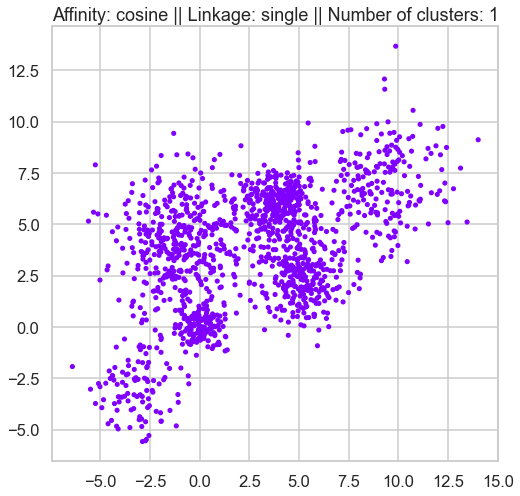

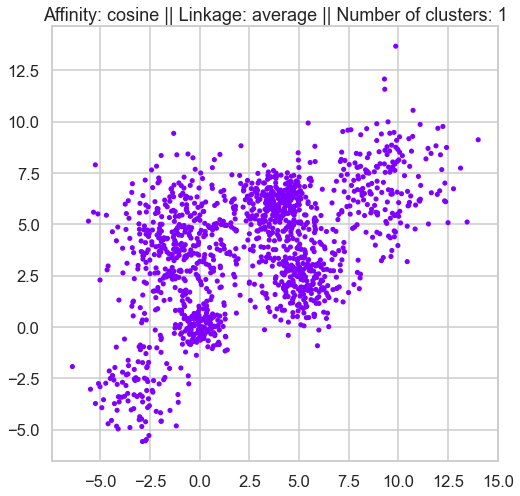

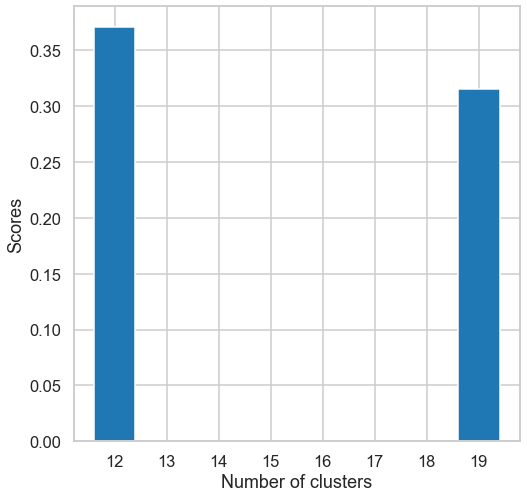

[12, 19] [0.3708760639215861, 0.31545970805720575]


In [49]:
affinities = ['euclidean',  'manhattan', 'cosine']
linkages = ['single','average']
dist_thrsh = 3.5 # only var to be edited

for affin in affinities:
    for links in linkages:
        Custom_Aggl_Clust(affin,links,dist_thrsh)

Silhouette_Score_plt()
N_clusters.clear()

#### For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters

In [398]:
Z = hierarchy.linkage(df_s, method = 'single')
Z.max()

2897.0

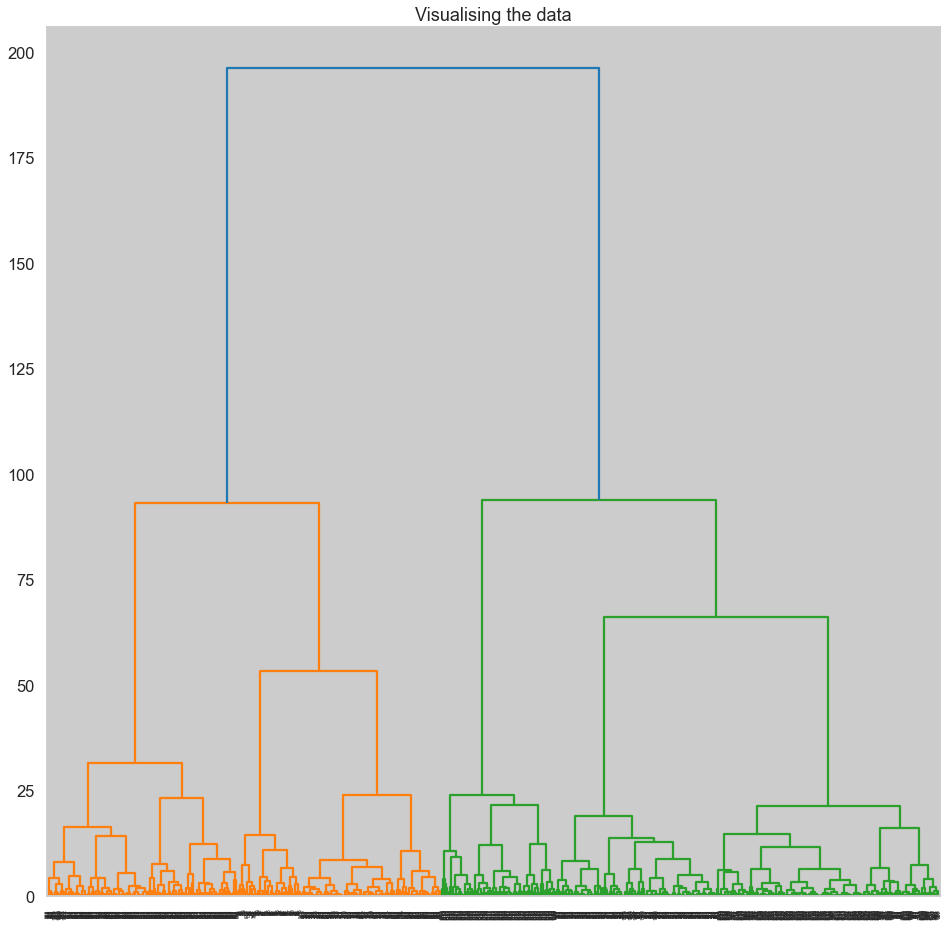

In [36]:
plt.figure(figsize = (16, 16))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df_s, method ='ward')))
plt.axhline(y = Z.max(),color='b',linestyle='-')

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [84]:
from kneed import KneeLocator

Estimated number of clusters 4: 
Estimated number of noise points: 260
Total number of points: 2900 
Effeciency: 8.965517%


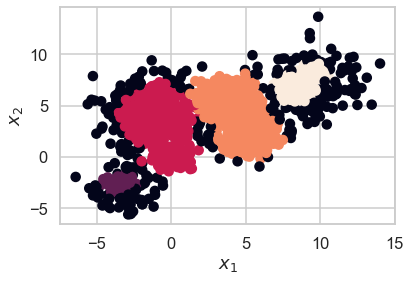

In [95]:
dbscan = DBSCAN(eps=opt_elbw, min_samples=25) # need to apply elbow method with kneed  instead of experimenting
dbscan.fit(test)

# Visualizing DBSCAN
plt.scatter(test[:, 0], test[:, 1], c=dbscan.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan.labels_
N_clusts=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated number of clusters {}: '.format(N_clusts) )

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated number of noise points: {}'.format(n_noise))
print("Total number of points: {} ".format(test.size))
print("Effeciency: {:%}".format(n_noise/(test.size)))
# Calculating v_measure
#print('v_measure =', v_measure_score(y, labels))


Elbow Point is 0.8795662680174702: 


<Figure size 360x360 with 0 Axes>

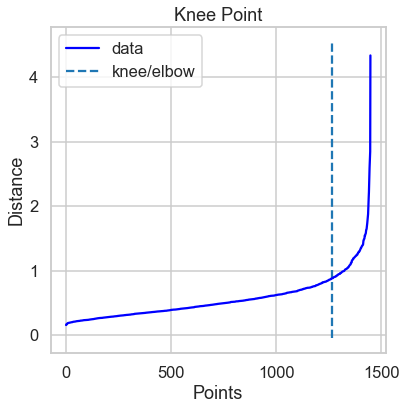

In [92]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(test)

distances, indices = neighbors.kneighbors(test)
distances = np.sort(distances[:,10], axis=0)

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
opt_elbw = distances[knee.knee]

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print('Elbow Point is {}: '.format(distances[knee.knee]))

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [7]:
from sklearn.mixture import GaussianMixture
import seaborn as sns
import plotly.express as px

#### Changed the covariance_type to all possibles and listed the difference in the resulting proabability fit

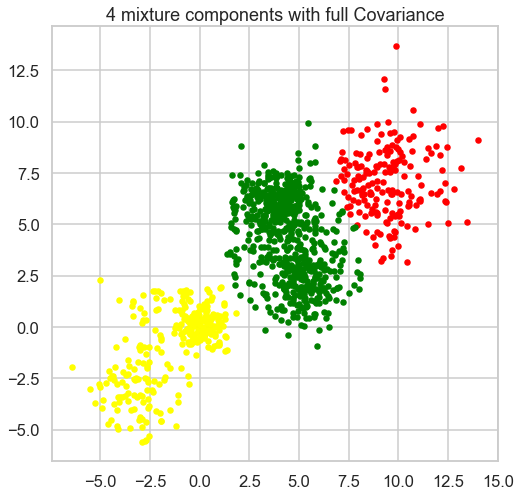

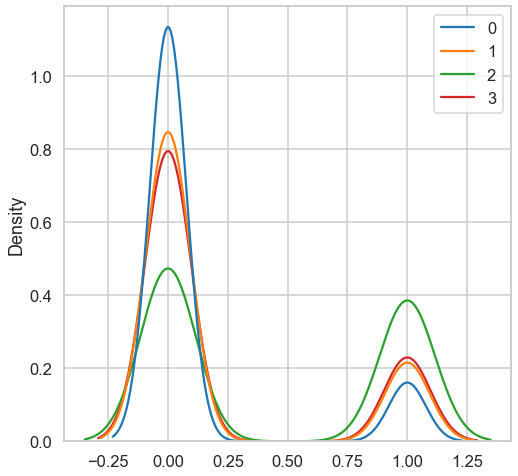

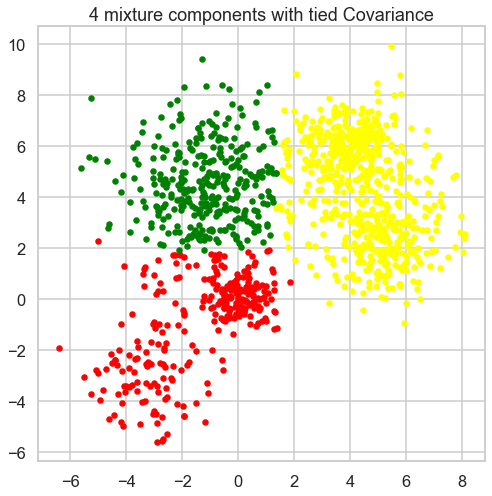

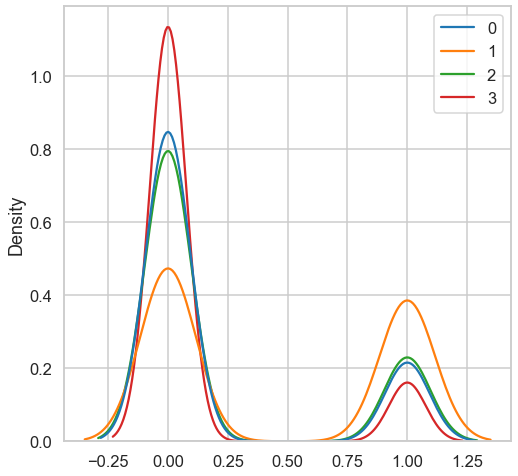

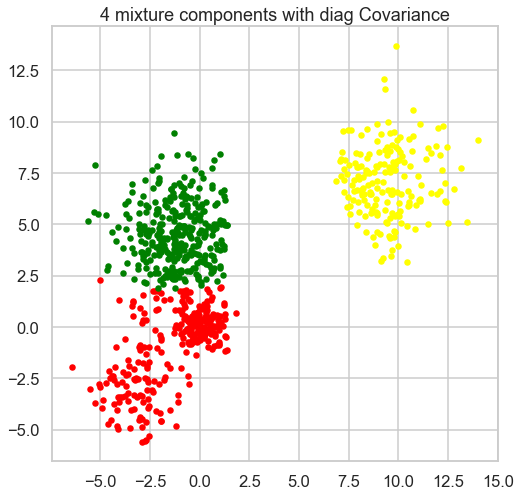

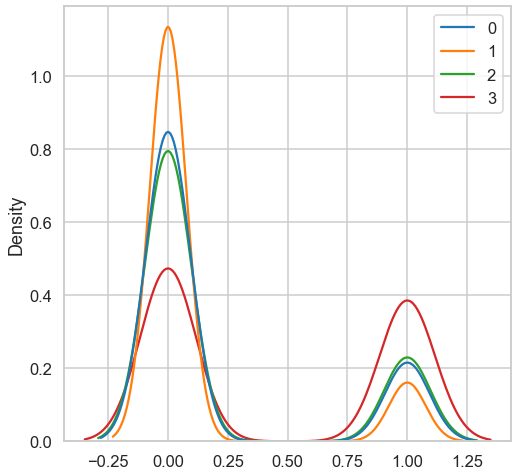

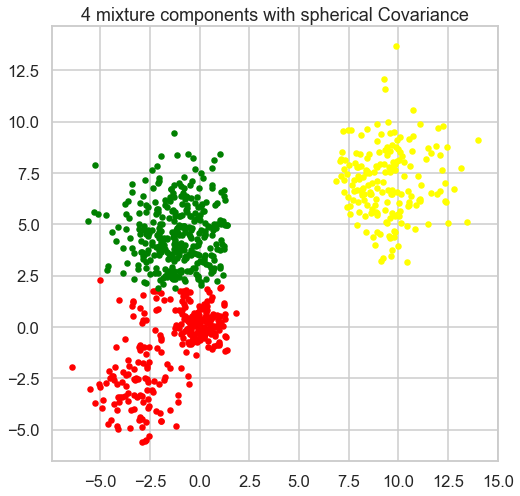

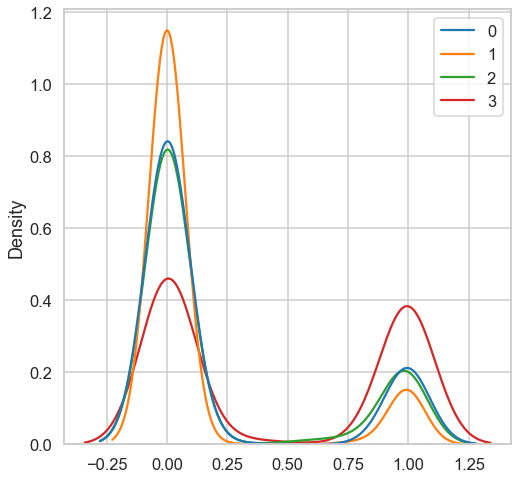

In [231]:
def Gaussian_cov(cov):
    gmm = GaussianMixture(n_components = 4, covariance_type=cov)
    gmm.fit(df_s)
    global probs  
    probs = gmm.predict_proba(df_s)
    global probs_df 
    probs_df = pd.DataFrame(probs)
        
    # Assign a label to each sample
    labels = gmm.predict(df_s)
    df_s['labels'] = labels
    df_s0 = df_s[df_s['labels']== 0]
    df_s1 = df_s[df_s['labels']== 1]
    df_s2 = df_s[df_s['labels']== 2]
        
    # Plot three clusters in same plot
    plt.scatter(df_s0[0], df_s0[1], c ='r',s=25)
    plt.scatter(df_s1[0], df_s1[1], c ='yellow',s=25)
    plt.scatter(df_s2[0], df_s2[1], c ='g',s=25)
    plt.title('4 mixture components with {} Covariance'.format(cov))
    plt.show()
    
    # Distributions
    sns.kdeplot(data=probs_df)
    plt.show()
    
    # 2D Contour plot
    fig = px.density_contour(probs_df)
    fig.update_traces(contours_coloring="fill") #, contours_showlabels = True ||| 
    fig.show()

### To get probability I can use verbose=2, but this will only output log probability (as per documentation)
### So we will have to convert to probability by using this equation e^(log_prob)/(1+e^{log_prob)
### Alternatively, I use the predict_proba method to compute the components' density for each sample.

cov_types = ['full','tied','diag','spherical']
for covars in cov_types:
    Gaussian_cov(covars)

<AxesSubplot:ylabel='Density'>

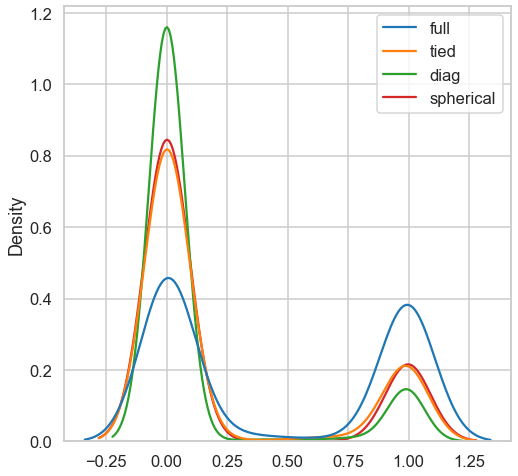

In [212]:
sns.kdeplot(data=probs_df)

In [223]:
gmm = GaussianMixture(n_components = 4, covariance_type='tied')
gmm.fit(test)
prob_t = gmm.predict_proba(test)


#### Used a 2D contour plot to plot the resulting distribution along total Gaussian mixture

In [22]:
from sklearn.mixture import GaussianMixture
from sklearn import mixture
from matplotlib.colors import LogNorm

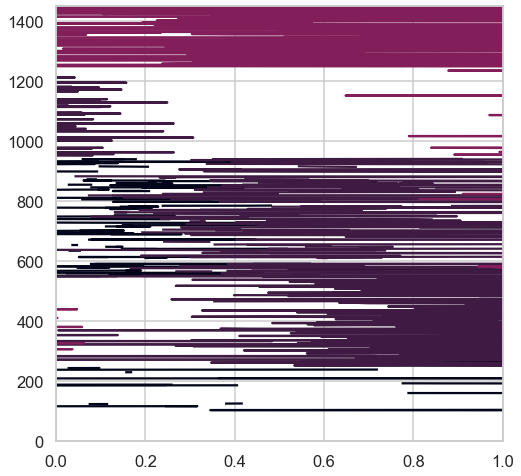

In [184]:
plt.contour(test, norm=LogNorm(vmin=1.0, vmax=500.0), levels=np.logspace(0, 4, 10))
#plt.scatter(test[:, 0], test[:, 1], 1.3)

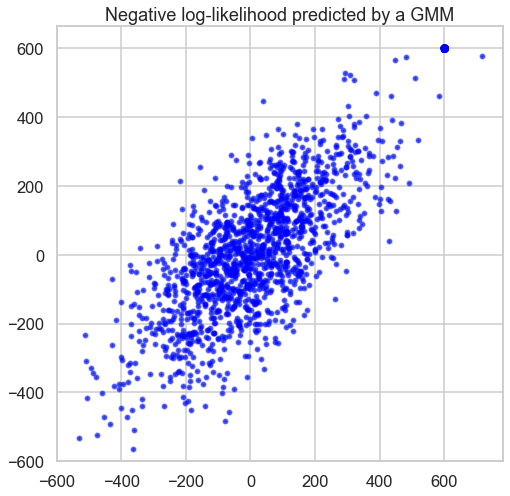

In [186]:
# Generate spherical data centered on (400,400,400)
shifted_gaussian = np.random.randn(1450, 3) + np.array([600,600,600])
#plt.scatter(shifted_gaussian[:, 0], shifted_gaussian[:, 1], 1.3)

C = df_s#.drop('labels',1)
stretched_gaussian = np.dot(np.random.randn(1450, 1450), C) #  (300,1450) * (1450,3) = (300,3)

# Concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

clf = mixture.GaussianMixture(n_components=4, covariance_type='tied')
clf.fit(X_train)

# Display predicted scores by the model as a contour plot
x = np.linspace(-600, 600,num = 80)
y = np.linspace(-600, 600,num = 80)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = probs.T.ravel()
Z = np.pad(Z, (0, 600), 'constant')
Z = Z.reshape(80,80)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=500.0), levels=np.logspace(0, 4, 10))
#CB = plt.colorbar(CS,shrink = 1.1) # , shrink=0.8, extend='both'
plt.scatter(X_train[:, 0], X_train[:, 1], 1.3)

display_cluster(X_train)
plt.title("Negative log-likelihood predicted by a GMM")
plt.show()

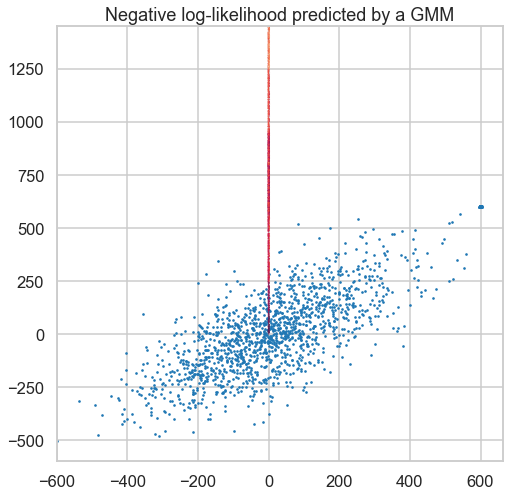

In [175]:
#el3ab hena
shifted_gaussian.fill(0)
stretched_gaussian.fill(0)

# Generate spherical data centered on (400,400,400)
#shifted_gaussian = np.random.randn(4000, 2) + np.array([0,0])
#print(shifted_gaussian.shape)

# Generate zero centered stretched Gaussian data
#stretched_gaussian = np.dot(shifted_gaussian, test.T) #  (1450,2) * (2,1450) = (1450,1450)
#print(stretched_gaussian.shape)

# Concatenate the two datasets into the final training set
#X_train = np.vstack([shifted_gaussian, stretched_gaussian])
#print(test.shape)

clf = mixture.GaussianMixture(n_components=4, covariance_type='tied')
clf.fit(test)

# Display predicted scores by the model as a contour plot
x = np.linspace(-600, 600,num = 80)
y = np.linspace(-600, 600,num = 80)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = probs.T.ravel()
Z = np.pad(Z, (0, 600), 'constant')
Z = Z.reshape(80,80)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=500.0), levels=np.logspace(0, 4, 10))
#CB = plt.colorbar(CS,shrink = 1.1) # , shrink=0.8, extend='both'
plt.scatter(X_train[:, 0], X_train[:, 1], 1.3)

#display_cluster(X_train)
plt.title("Negative log-likelihood predicted by a GMM")
plt.show()

In [188]:
probs.shape

(1450, 4)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 